In [1]:
pip install geopy

In [2]:
# import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy


from geopy.geocoders import Nominatim
#from geopy.geocoders import ArcGIS

#nom = ArcGIS()
#nom.geocode("Berlin")


# Lecture de notre fichier source 
airWater_data= pd.read_csv("cities_air_quality_water_pollution.18-10-2021.csv",header=None)

print(" \t \t \t \t NOTRE DATASET","\n")

airWater_data.head()

 	 	 	 	 NOTRE DATASET 



0                        1                            2  \
0              City                 "Region"                    "Country"   
1     New York City               "New York"   "United States of America"   
2  Washington, D.C.   "District of Columbia"   "United States of America"   
3     San Francisco             "California"   "United States of America"   
4            Berlin                       ""                    "Germany"   

                    3                    4  
0        "AirQuality"     "WaterPollution"  
1   46.81603773584906   49.504950495049506  
2   66.12903225806451   49.107142857142854  
3   60.51401869158879                   43  
4    62.3641304347826    28.61271676300578

In [3]:
airWater_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3964 entries, 0 to 3963
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3964 non-null   object
 1   1       3964 non-null   object
 2   2       3964 non-null   object
 3   3       3964 non-null   object
 4   4       3964 non-null   object
dtypes: object(5)
memory usage: 155.0+ KB


In [4]:
#Nettoyage des données et transformation des types de données
airWater_data.columns = airWater_data.iloc[0]

newAirWater_data = airWater_data.drop(airWater_data.index[0])

newAirWater_data.columns = newAirWater_data.columns.str.replace('"', ' ')
newAirWater_data.columns = newAirWater_data.columns.str.replace(' ', '')
newAirWater_data["Country"] = newAirWater_data["Country"].str.replace('"','')
newAirWater_data["WaterPollution"] = pd.to_numeric(newAirWater_data["WaterPollution"], downcast="float")
newAirWater_data["AirQuality"] = pd.to_numeric(newAirWater_data["AirQuality"], downcast="float")
newAirWater_data.head()

0              City                   Region                    Country  \
1     New York City               "New York"   United States of America   
2  Washington, D.C.   "District of Columbia"   United States of America   
3     San Francisco             "California"   United States of America   
4            Berlin                       ""                    Germany   
5       Los Angeles             "California"   United States of America   

0  AirQuality  WaterPollution  
1   46.816036       49.504951  
2   66.129036       49.107143  
3   60.514019       43.000000  
4   62.364132       28.612717  
5   36.621620       61.299435

In [5]:
#description des colonnes
newAirWater_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3963 entries, 1 to 3963
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3963 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float32
 4   WaterPollution  3963 non-null   float32
dtypes: float32(2), object(3)
memory usage: 154.8+ KB


In [6]:
#type de données des colonnes
newAirWater_data.dtypes

0
City               object
Region             object
Country            object
AirQuality        float32
WaterPollution    float32
dtype: object

In [7]:
#génére automatiquement des données statistiques de notre Data
newAirWater_data.describe()

0       AirQuality  WaterPollution
count  3963.000000     3963.000000
mean     62.253452       44.635349
std      30.944725       25.663761
min       0.000000        0.000000
25%      37.686567       25.000000
50%      69.444443       50.000000
75%      87.500000       57.719393
max     100.000000      100.000000

In [8]:
# Affichage du nombre de données nulles dans la DataFrame
newAirWater_data.isnull().sum()

0
City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64

In [9]:
# Affichage des dernières lignes de la dataframe
newAirWater_data.tail()

0            City               Region        Country  AirQuality  \
3959        Yanbu    "Medina Province"   Saudi Arabia    0.000000   
3960      Cordoba          "Andalusia"          Spain   85.714287   
3961          Vic          "Catalonia"          Spain  100.000000   
3962      Segovia   "Castile and Leon"          Spain  100.000000   
3963  Zamora city   "Castile and Leon"          Spain  100.000000   

0     WaterPollution  
3959       50.000000  
3960        8.333333  
3961        0.000000  
3962        0.000000  
3963       50.000000

In [10]:


# Suppression de la colonne Region

newAirWater_data = newAirWater_data.drop(columns = ["Region"])
#newAirWater_data["query"] = newAirWater_data["City"] + "," + newAirWater_data["Country"]

# Creation de la colonne AirPollution 

def subtraction_100(x):
    return 100 - x

newAirWater_data["AirPollution"] = newAirWater_data['AirQuality'].apply(subtraction_100)

# Creation de la colonne WaterQuality 

newAirWater_data["WaterQuality"] = newAirWater_data['WaterPollution'].apply(subtraction_100)

newAirWater_data.head()



0              City                    Country  AirQuality  WaterPollution  \
1     New York City   United States of America   46.816036       49.504951   
2  Washington, D.C.   United States of America   66.129036       49.107143   
3     San Francisco   United States of America   60.514019       43.000000   
4            Berlin                    Germany   62.364132       28.612717   
5       Los Angeles   United States of America   36.621620       61.299435   

0  AirPollution  WaterQuality  
1     53.183964     50.495049  
2     33.870964     50.892857  
3     39.485981     57.000000  
4     37.635868     71.387283  
5     63.378380     38.700565

In [11]:
#newAirWater_data["coordinates"] = newAirWater_data["query"].apply(nom.geocode)
#from operator import attrgetter

#locations = newAirWater_data["query"].apply(lambda r: nom.geocode(list(r)))
#nonnull = locations.notnull()
#newAirWater_data.loc[nonnull, 'longitude'] = locations[nonnull].apply(attrgetter('longitude'))
#newAirWater_data.loc[nonnull, 'latitude'] = locations[nonnull].apply(attrgetter('latitude'))

Text(0, 0.5, 'Pays')

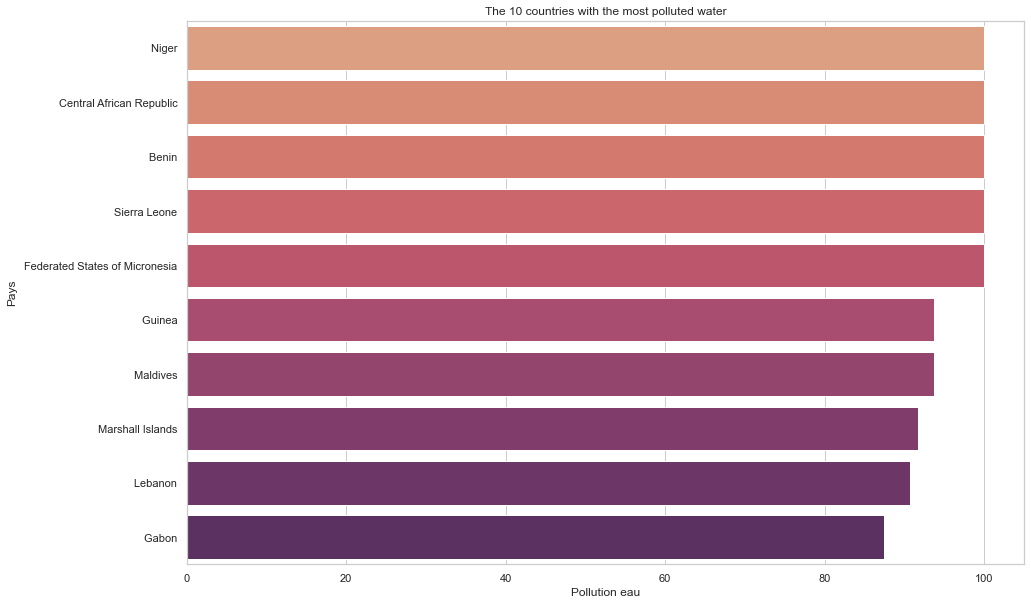

In [19]:
average_water_pollution = newAirWater_data.groupby('Country', as_index=False).agg({"WaterPollution":"mean"})

top_10_water_pollution = average_water_pollution.sort_values('WaterPollution', ascending = False).head(10)

overall_avg_water_pol = average_water_pollution['WaterPollution'].mean()

plt.figure(figsize = (15,10))
sns.barplot(x='WaterPollution',y='Country',data=top_10_water_pollution, palette="flare")
plt.title('The 10 countries with the most polluted water')
plt.xlabel('Pollution eau')
plt.ylabel('Pays')

Text(0, 0.5, 'Pays')

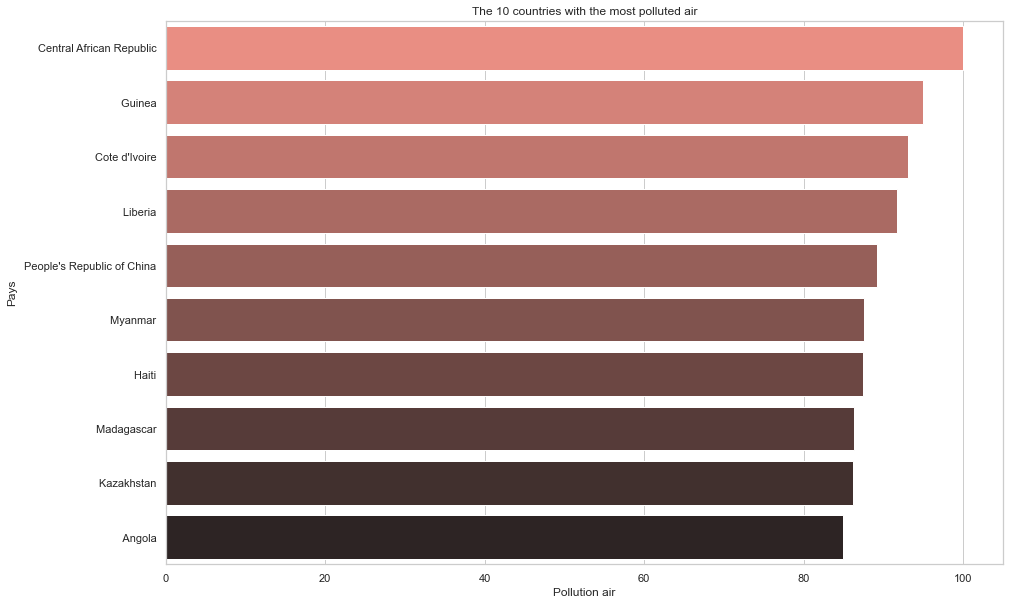

In [18]:
average_air_pollution = newAirWater_data.groupby("Country",
                                                   as_index=False).agg({"AirPollution":"mean"})

top_10_air_pollution = average_air_pollution.sort_values("AirPollution",
                                                         ascending = False).head(10)

overall_avg_air_pol = average_air_pollution["AirPollution"].mean()

plt.figure(figsize = (15,10))
sns.barplot(y='Country',x='AirPollution',data=top_10_air_pollution, palette="dark:salmon_r")
plt.title('The 10 countries with the most polluted air')
plt.xlabel('Pollution air')
plt.ylabel('Pays')



Text(0, 0.5, 'Country')

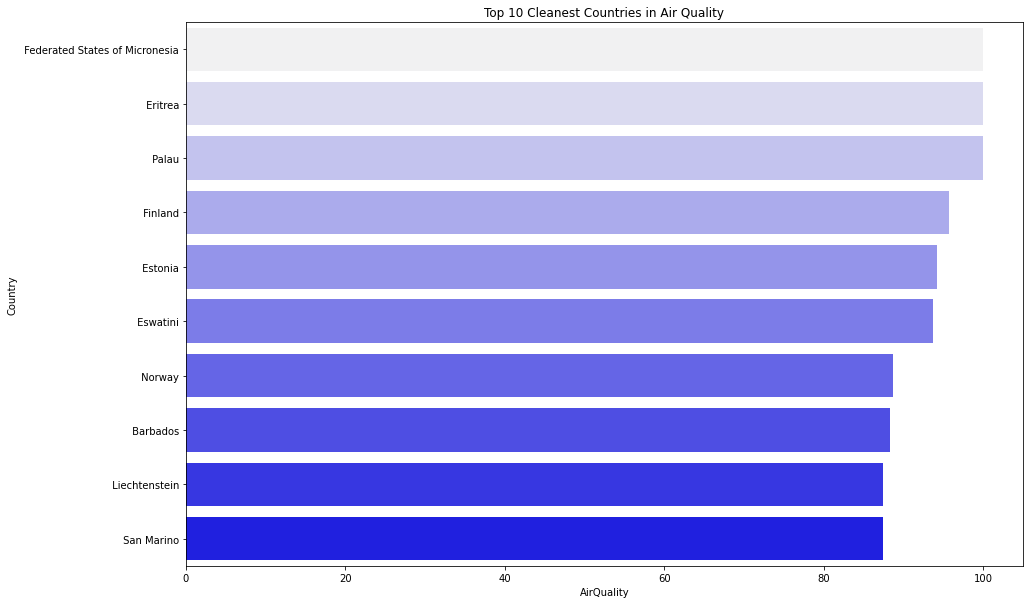

In [15]:
average_air_quality = newAirWater_data.groupby("Country", as_index=False).agg({"AirQuality":"mean"})

top_10_air_quality = average_air_quality.sort_values("AirQuality", ascending = False).head(10)

overall_avg_air_qual = average_air_quality["AirQuality"].mean()

plt.figure(figsize = (15,10))
sns.barplot(x='AirQuality',y='Country',data=top_10_air_quality, palette="light:b")
plt.title('Top 10 Cleanest Countries in Air Quality')
plt.xlabel('AirQuality')
plt.ylabel('Country')



Text(0, 0.5, 'Country')

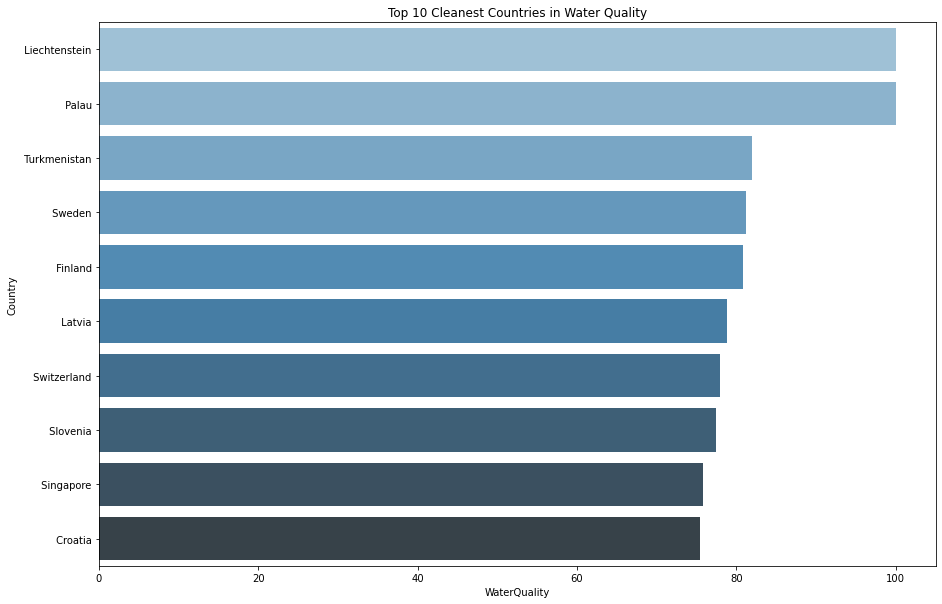

In [16]:
average_water_quality = newAirWater_data.groupby("Country",
                                                   as_index=False).agg({"WaterQuality":"mean"})

top_10_water_quality = average_water_quality.sort_values("WaterQuality", 
                                                         ascending = False).head(10)

overall_avg_water_qual = average_water_quality["WaterQuality"].mean()

plt.figure(figsize = (15,10))
sns.barplot(x='WaterQuality',
            y='Country',
            data=top_10_water_quality,
            palette="Blues_d")
plt.title('Top 10 Cleanest Countries in Water Quality')
plt.xlabel('WaterQuality')
plt.ylabel('Country')



Text(0, 0.5, 'Quality Score')

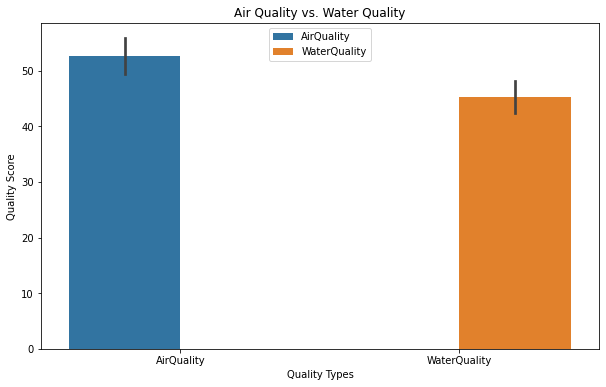

In [17]:
#Comparaison sur la moyenne de la qualité d'air et de la qualité d'eau en regroupant par pays 
average_quality_scores = newAirWater_data.groupby("Country", as_index=False).agg({"AirQuality":"mean", "WaterQuality":"mean"})
average_quality_scores_pivot = pd.melt(average_quality_scores,
                                       id_vars=['Country'],
                                       value_vars=['AirQuality',
                                                   'WaterQuality'],
                                       var_name='Quality_Types',
                                       value_name='Avg_Scores')

#Affichage de cette moyenne à travers la librairie seaborn et matplotlib
plt.figure(figsize = (10,6))
sns.barplot(x = "Quality_Types",
            y = "Avg_Scores",
            data = average_quality_scores_pivot,
            hue = "Quality_Types")
plt.legend(loc='upper center')
plt.title('Air Quality vs. Water Quality')
plt.xlabel('Quality Types')
plt.ylabel("Quality Score")

In [18]:
# TEST :  concatenation de la colonne city et country pour creer une colonne query
newAirWater_data['query'] = newAirWater_data['City'] + " " +  newAirWater_data['Country']

#creation des 3 nouvelles colonnes pour enregistrer les coordonnées géographiques des villes - on initialise à une valeur NULL pour commencer
newAirWater_data['location_lat'] = ""
newAirWater_data['location_long'] = ""
newAirWater_data['location_address'] = ""

#affichage des premières lignes pour un test
newAirWater_data.head()

0              City                    Country  AirQuality  WaterPollution  \
1     New York City   United States of America   46.816036       49.504951   
2  Washington, D.C.   United States of America   66.129036       49.107143   
3     San Francisco   United States of America   60.514019       43.000000   
4            Berlin                    Germany   62.364132       28.612717   
5       Los Angeles   United States of America   36.621620       61.299435   

0  AirPollution  WaterQuality                                       query  \
1     53.183964     50.495049     New York City  United States of America   
2     33.870964     50.892857  Washington, D.C.  United States of America   
3     39.485981     57.000000     San Francisco  United States of America   
4     37.635868     71.387283                             Berlin  Germany   
5     63.378380     38.700565       Los Angeles  United States of America   

0 location_lat location_long location_address  
1                                              
2                                              
3                                              
4                                              
5

In [19]:
'''
**Récupération des Latitudes/Longitudes des données grâce à la librairie GeoPy**
'''


geolocator = Nominatim(user_agent="myApp")

for i in newAirWater_data.index:
    try:
        #affecte les latitudes et longitudes pour chaque ligne depuis l'appel de geopy
        location = geolocator.geocode(newAirWater_data['query'][i])
        
        
        newAirWater_data.loc[i,'location_lat'] = location.latitude
        newAirWater_data.loc[i,'location_long'] = location.longitude
        newAirWater_data.loc[i,'location_address'] = location.address
    except:
        
        newAirWater_data.loc[i,'location_lat'] = ""
        newAirWater_data.loc[i,'location_long'] = ""
        newAirWater_data.loc[i,'location_address'] = ""

#affiche les 20 premières de la dataframe
newAirWater_data.head()

0              City                    Country  AirQuality  WaterPollution  \
1     New York City   United States of America   46.816036       49.504951   
2  Washington, D.C.   United States of America   66.129036       49.107143   
3     San Francisco   United States of America   60.514019       43.000000   
4            Berlin                    Germany   62.364132       28.612717   
5       Los Angeles   United States of America   36.621620       61.299435   

0  AirPollution  WaterQuality                                       query  \
1     53.183964     50.495049     New York City  United States of America   
2     33.870964     50.892857  Washington, D.C.  United States of America   
3     39.485981     57.000000     San Francisco  United States of America   
4     37.635868     71.387283                             Berlin  Germany   
5     63.378380     38.700565       Los Angeles  United States of America   

0 location_lat location_long  \
1      40.7127       -74.006   
2                              
3       37.779       -122.42   
4      52.5187       13.3996   
5      34.0537      -118.243   

0                                   location_address  
1                            New York, United States  
2                                                     
3           San Francisco, California, United States  
4                         Berlin, 10178, Deutschland  
5  Los Angeles, Los Angeles County, California, U...

In [20]:
#Conversion du type de données des colonnes location_lat et location_long en float
newAirWater_data["location_lat"] = pd.to_numeric(newAirWater_data["location_lat"], downcast="float")
newAirWater_data["location_long"] = pd.to_numeric(newAirWater_data["location_long"], downcast="float")
newAirWater_data=newAirWater_data.dropna(subset=['location_lat'])
newAirWater_data=newAirWater_data.dropna(subset=['location_long'])
newAirWater_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 1 to 3963
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              3956 non-null   object 
 1   Country           3956 non-null   object 
 2   AirQuality        3956 non-null   float32
 3   WaterPollution    3956 non-null   float32
 4   AirPollution      3956 non-null   float64
 5   WaterQuality      3956 non-null   float64
 6   query             3956 non-null   object 
 7   location_lat      3956 non-null   float32
 8   location_long     3956 non-null   float32
 9   location_address  3956 non-null   object 
dtypes: float32(4), float64(2), object(4)
memory usage: 278.2+ KB


In [25]:
import folium # Visualisation des données sur une carte
import numpy as np # importation de la librairie Numpy


# Création de la carte 
m = folium.Map(location = [30,8],tiles="OpenStreetMap",zoom_start = 3, max_zoom = 12, min_zoom = 2)
# boucle parcourant la dataframfe newAirWater_data
for i in range(0,len(newAirWater_data)):
    # Affichage des cercles sur la carte avec des critères de condition sur la pollution de l'air 
    if(newAirWater_data.iloc[i]['AirPollution']<40):
        folium.Circle(
                location = [newAirWater_data.iloc[i]['location_lat'], newAirWater_data.iloc[i]['location_long']],
                # Remplissage des couleurs = True
                fill=True,
                # Couleur verte pollution de l'air faible suivi d'un texte sur la ville qui affiche les autres informations disponibles dans la DataFrame
                radius= 10000,
                color='green',
                fill_color = 'green',
                tooltip = "<div style='margin:0; background-color:black; color:white;'>"+
                                "<h4 style='text-align:center; font-weight:bold'>"+newAirWater_data.iloc[i]['City']+"</h4>"
                                "<hr style='margin:10px; color:white;'>"+
                                "<ul style='color:white;; list-style-type:circle; align-item:left; padding-left:20px; padding-right:20px'>"+
                                "<li>Pollution d'air: "+ str(newAirWater_data.iloc[i]['AirPollution'])+"</li>"+
                                "<li>Qualité d'air: "+ str(newAirWater_data.iloc[i]['AirQuality'])+"</li>"+
                                "<li>Qualité d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterQuality'])+"</li>"+
                                "<li>Pollution d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterPollution'])+"</li>"+
                                "</ul></div>",

            ).add_to(m)
    if(newAirWater_data.iloc[i]['AirPollution']>40 and newAirWater_data.iloc[i]['AirPollution']<75):
        folium.Circle(
                location = [newAirWater_data.iloc[i]['location_lat'], newAirWater_data.iloc[i]['location_long']],
                # Remplissage des couleurs = True
                fill=True,
                # Couleur orange pollution de l'air moyen suivi d'un texte sur la ville qui affiche les autres informations disponibles dans la DataFrame
                radius= 10000,
                color='orange',
                fill_color = 'orange',
                tooltip = "<div style='margin:0; background-color:black; color:white;'>"+
                                "<h4 style='text-align:center; font-weight:bold'>"+newAirWater_data.iloc[i]['City']+"</h4>"
                                "<hr style='margin:10px; color:white;'>"+
                                "<ul style='color:white;; list-style-type:circle; align-item:left; padding-left:20px; padding-right:20px'>"+
                                "<li>Pollution d'air: "+ str(newAirWater_data.iloc[i]['AirPollution'])+"</li>"+
                                "<li>Qualité d'air: "+ str(newAirWater_data.iloc[i]['AirQuality'])+"</li>"+
                                "<li>Qualité d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterQuality'])+"</li>"+
                                "<li>Pollution d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterPollution'])+"</li>"+
                                "</ul></div>",

            ).add_to(m)
        
    if(newAirWater_data.iloc[i]['AirPollution']>75):
        folium.Circle(
                location = [newAirWater_data.iloc[i]['location_lat'], newAirWater_data.iloc[i]['location_long']],
                # Remplissage des couleurs = True
                fill=True,
                 # Couleur rouge dû à la fortre pollution de l'air suivi d'un texte sur la ville qui affiche les autres informations disponibles dans la DataFrame
                radius= 10000,
                color='red',
                fill_color = 'red',
                tooltip = "<div style='margin:0; background-color:black; color:white;'>"+
                                "<h4 style='text-align:center; font-weight:bold'>"+newAirWater_data.iloc[i]['City']+"</h4>"
                                "<hr style='margin:10px; color:white;'>"+
                                "<ul style='color:white;; list-style-type:circle; align-item:left; padding-left:20px; padding-right:20px'>"+
                                "<li>Pollution d'air: "+ str(newAirWater_data.iloc[i]['AirPollution'])+"</li>"+
                                "<li>Qualité d'air: "+ str(newAirWater_data.iloc[i]['AirQuality'])+"</li>"+
                                "<li>Qualité d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterQuality'])+"</li>"+
                                "<li>Pollution d'eau en pourcentage: "+ str(newAirWater_data.iloc[i]['WaterPollution'])+"</li>"+
                                "</ul></div>",

            ).add_to(m)

m

In [22]:
# Test : affichage des villes de notre Dataframe
print(newAirWater_data['City'])

1       New York City
3       San Francisco
4              Berlin
5         Los Angeles
6                Bern
            ...      
3959            Yanbu
3960          Cordoba
3961              Vic
3962          Segovia
3963      Zamora city
Name: City, Length: 3956, dtype: object
